In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/sreekavyakashamshetty/Downloads/US_Accidents_Dec21_updated.csv')

In [4]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
data.info

<bound method DataFrame.info of                 ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0       

In [8]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [9]:
data['Severity'].value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

In [10]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Data cleaning


In [11]:
set(data['City'].values)

{nan,
 'Pequea',
 'Newfoundland',
 'Webb City',
 'Sunbury',
 'Fort Gay',
 'Withee',
 'Greens',
 'Metz',
 'The Sea Ranch',
 'Lindstrom',
 'Grindstone',
 'Merritt Island',
 'Uxbridge',
 'Brasstown',
 'Palos Hills',
 'Westernport',
 'Tupman',
 'Kettle Falls',
 'Pearblossom',
 'Tallassee',
 'Flushing',
 'Iron Mountain',
 'Orange',
 'Brookpark',
 'Table Rock',
 'Dixfield',
 'Rio Dell',
 'Monte Sereno',
 'Rancho Cucamonga',
 'New Lisbon',
 'Valley Grove',
 'Moncure',
 'Smiths Grove',
 'Helendale',
 'Swartz Creek',
 'Ellendale',
 'Cimarron',
 'Stroudsburg',
 'Edwardsville',
 'Harker Heights',
 'Selden',
 'Moscow Mills',
 'Biggs',
 'Plumerville',
 'Excelsior',
 'Indianola',
 'Plentywood',
 'Juneau',
 'Crimora',
 'Tuolumne',
 'Stanfield',
 'Frostproof',
 'Tupper Lake',
 'Edgefield',
 'Karns City',
 'Oneonta',
 'Monona',
 'Destrehan',
 'Whiteriver',
 'Redding',
 'Mableton',
 'Culver City',
 'Cuervo',
 'Emmaus',
 'Orinda',
 'Olive Branch',
 'Morriston',
 'Bettendorf',
 'Summerhill',
 'Varnville',

In [9]:
# data = data[~pd.isnull(data['City'])]

In [5]:
print(data.shape)
data.dropna(inplace = True)
print(data.shape)

(2845342, 47)
(943318, 47)


In [231]:
data['Wind_Chill(F)'].value_counts()

 77.0     25245
 73.0     24669
 75.0     23461
 79.0     23042
 72.0     22002
 70.0     20841
 81.0     20664
 82.0     20217
 76.0     19929
 74.0     19623
 64.0     19288
 68.0     19278
 78.0     19201
 63.0     18896
 66.0     18792
 80.0     18563
 61.0     17664
 54.0     17278
 57.0     17053
 59.0     17042
 71.0     16915
 50.0     16651
 55.0     16607
 84.0     16493
 83.0     16475
 69.0     16452
 52.0     15759
 67.0     15317
 65.0     15042
 86.0     14625
 88.0     14021
 85.0     13840
 62.0     13713
 60.0     13565
 58.0     13308
 56.0     12501
 53.0     12423
 87.0     12400
 51.0     11470
 45.0     10546
 90.0     10444
 89.0     10253
 41.0      9912
 43.0      9893
 44.0      9283
 42.0      9087
 39.0      8956
 46.0      8164
 37.0      8103
 40.0      7847
 91.0      7837
 36.0      7556
 38.0      7070
 32.0      6677
 34.0      6478
 30.0      6056
 47.0      5930
 48.0      5723
 33.0      5702
 35.0      5450
 31.0      5022
 93.0      4727
 92.0   

In [6]:
data.drop(columns=['Number'],axis=1,inplace=True)

In [20]:
bool_attributes = data.select_dtypes(include='bool')
bool_attributes.head()


,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False,False,False,False


In [21]:
data["End_Time"] = pd.to_datetime(data["End_Time"])
data["Start_Time"] = pd.to_datetime(data["Start_Time"])

In [22]:
cities=data.City.unique()
len(cities)

10788

In [7]:
data.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [24]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# EDA

In [25]:
accidents_city_wise = data.City.value_counts()
accidents_city_wise[:20]

#Top 20 cities where accidents occured

Miami           104463
Los Angeles      63161
Orlando          53796
Dallas           41014
Houston          37376
Sacramento       31744
Charlotte        31444
San Diego        25738
Raleigh          22516
Minneapolis      22480
Portland         20095
Nashville        19930
Baton Rouge      17682
Saint Paul       16349
Austin           16275
Phoenix          16087
New Orleans      15457
Atlanta          14433
Jacksonville     14421
Richmond         13414
Name: City, dtype: int64

([<matplotlib.patches.Wedge at 0x7fda57bc09a0>,
 [Text(0.5042156013836178, 0.9776331762585375, 'Miami'),
  Text(-1.0539112855842785, 0.31507301077384203, 'Los Angeles'),
  Text(-0.6531574640509975, -0.885090575678258, 'Orlando'),
  Text(0.385162957072325, -1.0303637690152456, 'Dallas'),
  Text(1.0167090921888404, -0.41988405764037323, 'Houston')],
 [Text(0.2750266916637915, 0.5332544597773841, '34.84%'),
  Text(-0.5748607012277882, 0.17185800587664107, '21.07%'),
  Text(-0.3562677076641804, -0.4827766776426861, '17.94%'),
  Text(0.2100888856758136, -0.562016601281043, '13.68%'),
  Text(0.5545685957393675, -0.22902766780383993, '12.47%')])

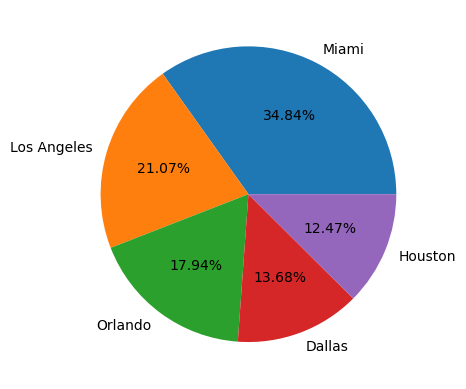

In [26]:
counts=data.City.value_counts()
plt.pie(counts.values[:5],labels=counts.index[:5],autopct="%1.2f%%")

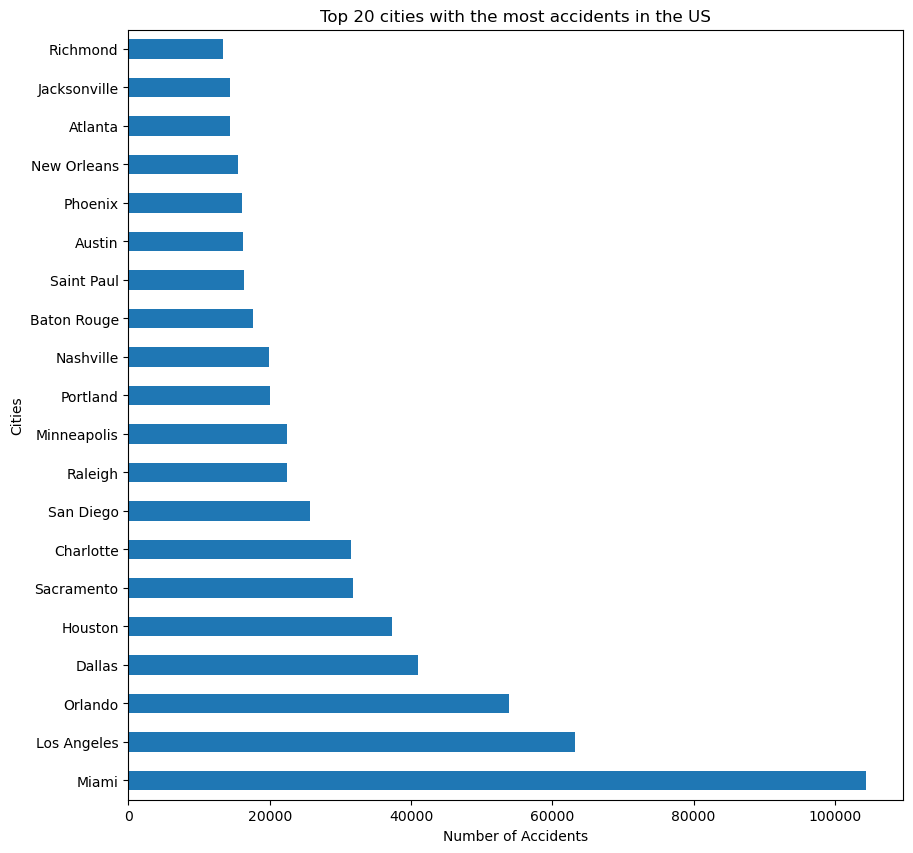

In [27]:
city_accidents = data.City.value_counts()
plt.figure(figsize = (10,10))
city_accidents[:20].plot(kind = 'barh')
plt.title("Top 20 cities with the most accidents in the US")
plt.xlabel("Number of Accidents")
plt.ylabel("Cities")
plt.show()

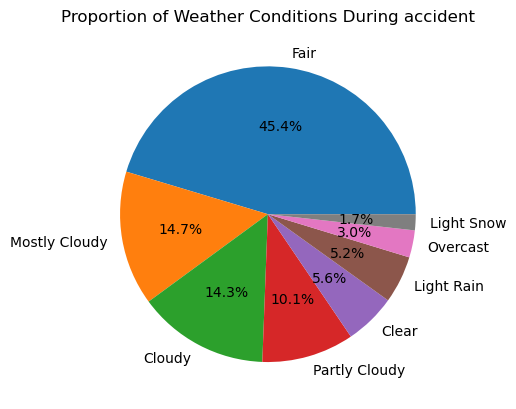

In [29]:
weather_condition_counts = (data['Weather_Condition'].value_counts()/data.shape[0])*100
accident=weather_condition_counts[weather_condition_counts>1.5]
plt.pie(accident.values, labels=accident.index, autopct='%1.1f%%')
plt.title('Proportion of Weather Conditions During accident')
plt.show()

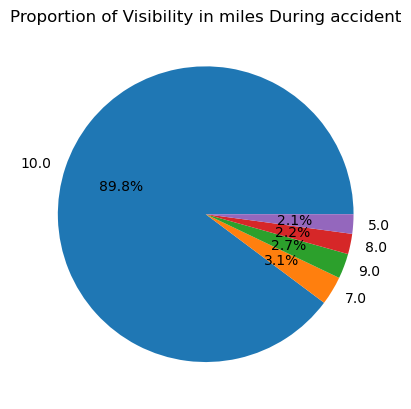

In [30]:
visibility_miles = (data['Visibility(mi)'].value_counts()/data.shape[0])*100
vis=visibility_miles[visibility_miles>1.8]
plt.pie(vis.values, labels=vis.index, autopct='%1.1f%%')
plt.title('Proportion of Visibility in miles During accident')
plt.show()
#It is observed that most accoident took place when the visibility is fair.

<AxesSubplot:ylabel='Side'>

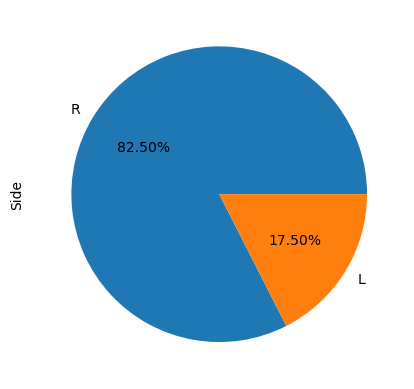

In [31]:
data['Side'].value_counts().plot(kind='pie', autopct='%1.2f%%')
#Accidents in right side vs left side

# Distribution of accidents by the Hour

We can check if there are more accidents in at a certain hour or whether the data is more evenly spread out. This can help us answer qustions like is the number of accidents higher in the peak hours when more people are traveling to their workplace.

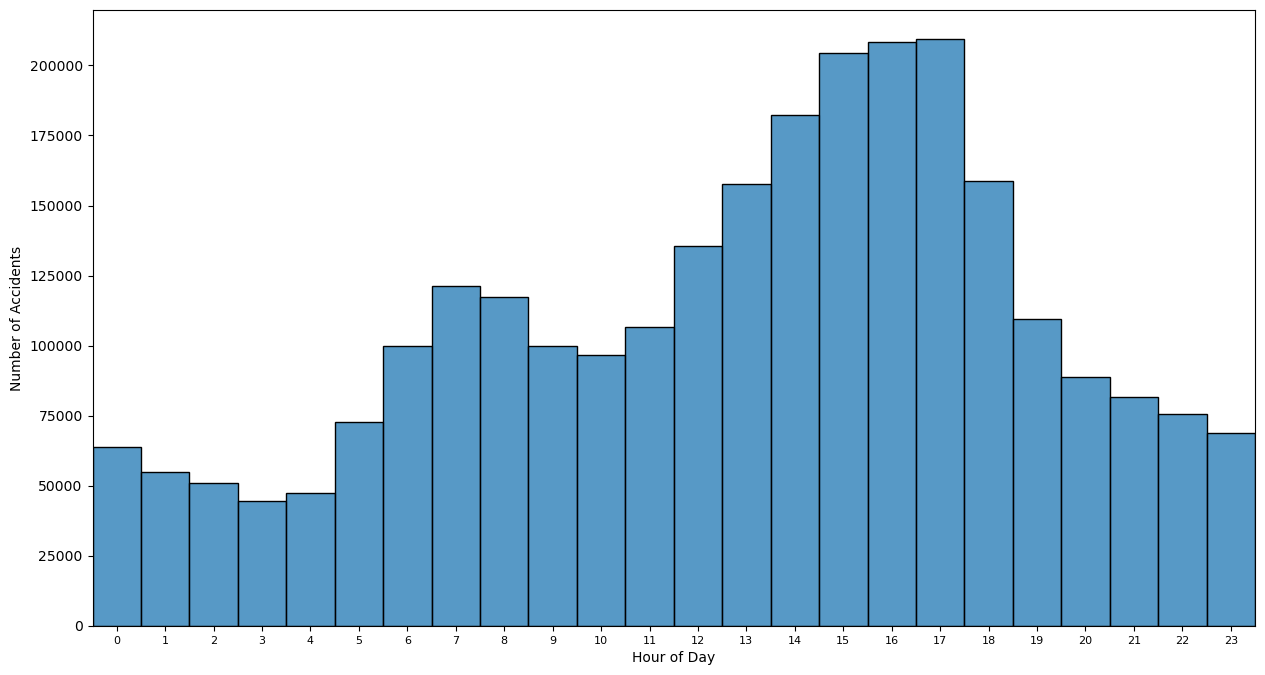

In [32]:

data['Hour_of_Day'] = data.Start_Time.dt.hour
def bins_labels(bins, labels, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), labels, **kwargs)
    plt.xlim(bins[0], bins[-1])
plt.figure(figsize=(15, 8))
bins = range(0, 25)
ax = sns.histplot(data.Hour_of_Day, bins=bins)
ax.set(xlabel='Hour of Day', ylabel='Number of Accidents')
hr_labels = np.arange(24)
bins_labels(bins, hr_labels, fontsize=8)

     

# Distribution of Accidents By Day

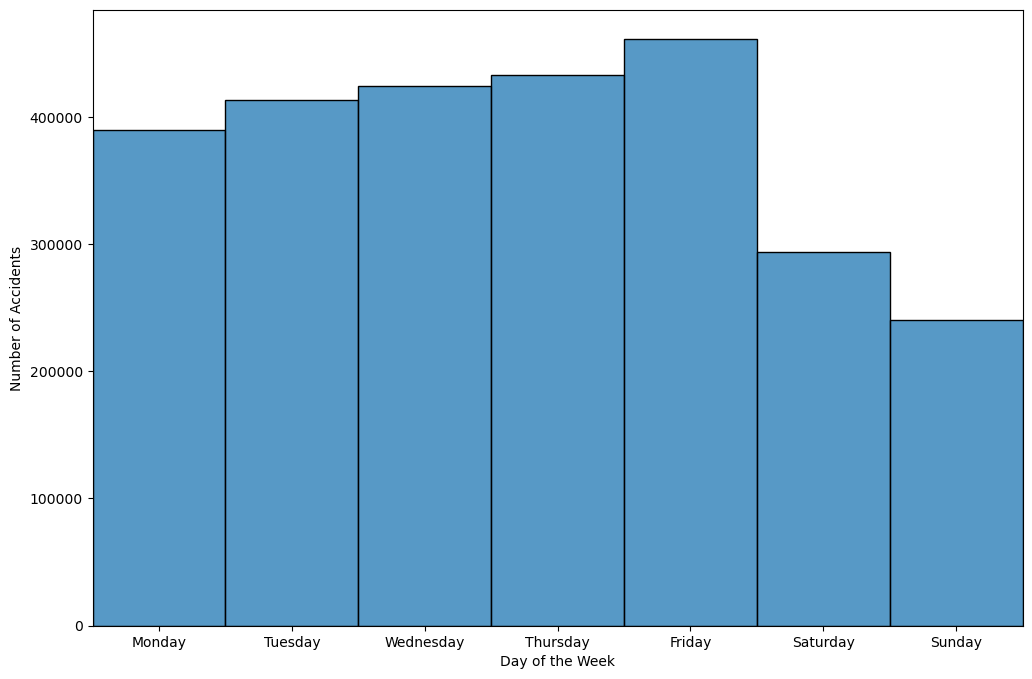

In [33]:
data['Day_of_Week'] = data.Start_Time.dt.dayofweek
plt.figure(figsize=(12, 8))
bins_range = range(0, 8)
ax = sns.histplot(data.Day_of_Week, bins=bins)
ax.set(xlabel='Day of the Week', ylabel='Number of Accidents')
labels_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bins_labels(bins_range, labels_list, fontsize=10)
plt.show()
     


# Distribution by Month

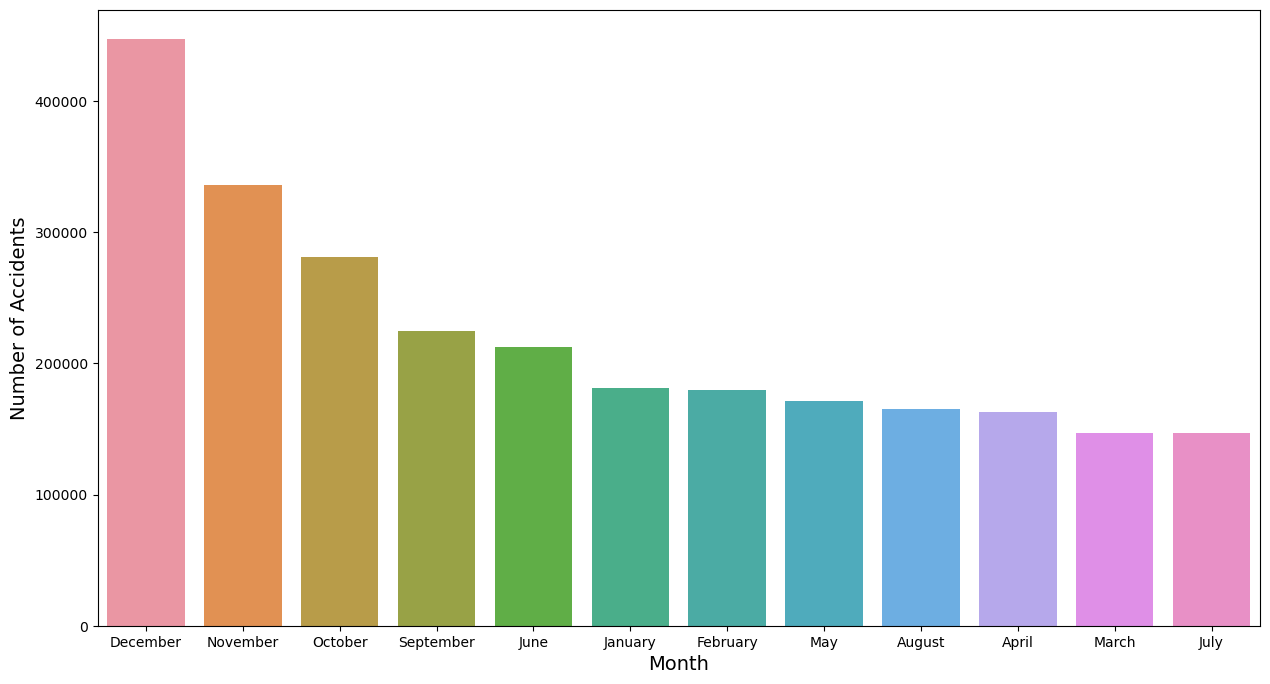

In [34]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=data.Start_Time.dt.month_name().value_counts().index, y=data.Start_Time.dt.month_name().value_counts())
ax.set(xlabel='Month', ylabel='Number of Accidents')
for i in [ax.xaxis.label, ax.yaxis.label]:
    i.set_fontsize(14)
plt.show()
     

# Distribution by Year

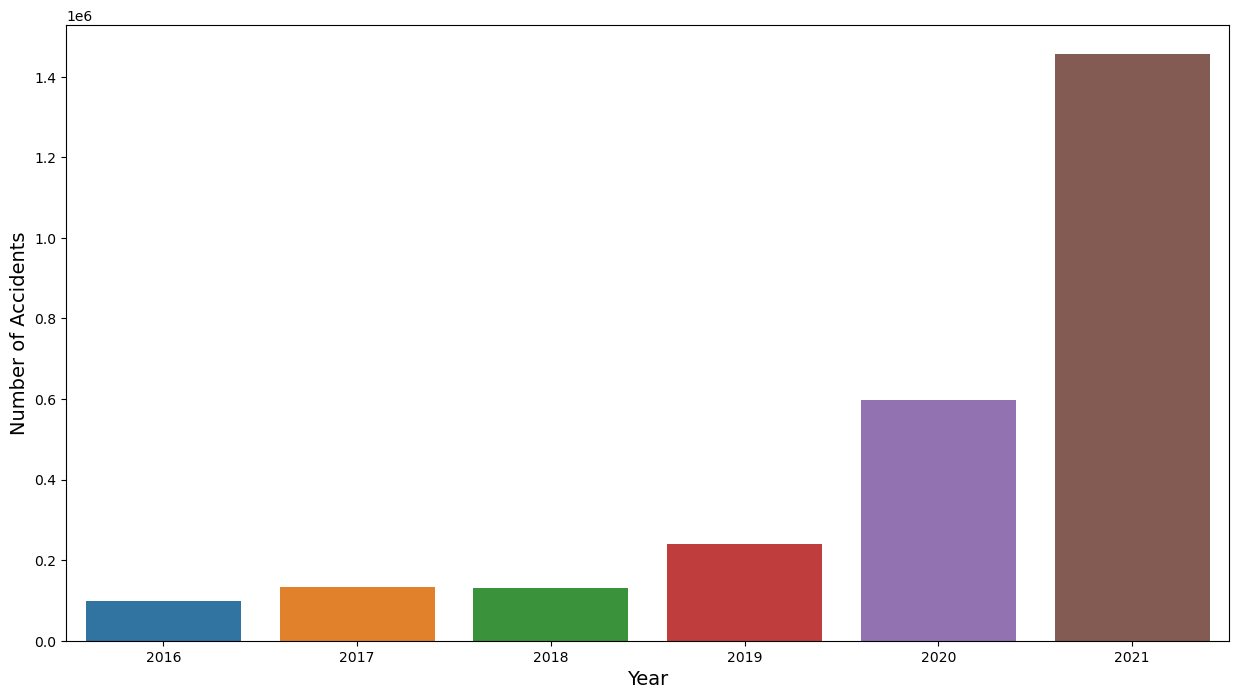

In [35]:

data.Start_Time.dt.year.value_counts()
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x=data.Start_Time.dt.year)
ax.set(xlabel='Year', ylabel='Number of Accidents')
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(14)
plt.show()

In [36]:
data.State.value_counts()[:5]
total = data.State.value_counts()[:5].sum()
percentage = total / len(data) * 100
print(f"Number of accidents reported by the Top 5 States = {total}")
print(f"Total number of accidents in the dataset = {len(data)}")
print(f"Percentage of total number of accidents reported by Top 5 States = {round(percentage, 2)}%")

Number of accidents reported by the Top 5 States = 1487839
Total number of accidents in the dataset = 2655884
Percentage of total number of accidents reported by Top 5 States = 56.02%


In [37]:
temp_counts_df = pd.DataFrame(data['Temperature(F)'].value_counts(bins=bins, sort=False).reset_index())
temp_counts_df.columns = ['Temperature', 'No. of Accidents']
temp_counts_df.head()

,Temperature,No. of Accidents
0,"(-0.001, 1.0]",1931
1,"(1.0, 2.0]",831
2,"(2.0, 3.0]",1048
3,"(3.0, 4.0]",754
4,"(4.0, 5.0]",1187


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

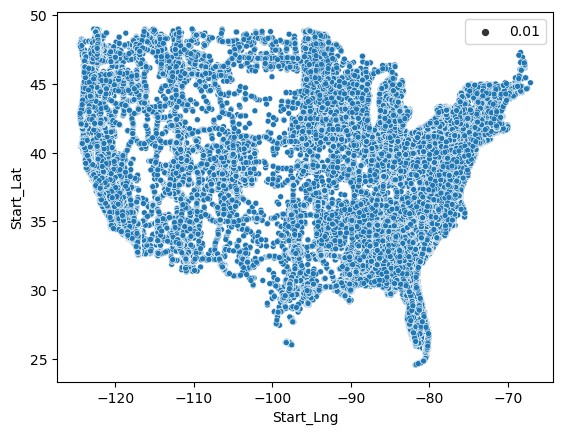

In [38]:
sns.scatterplot(x=data.Start_Lng, y= data.Start_Lat, size= 0.01)

In [39]:
state_data = data.State.value_counts()
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

df = state_data
fig = px.bar(df)

fig.show()

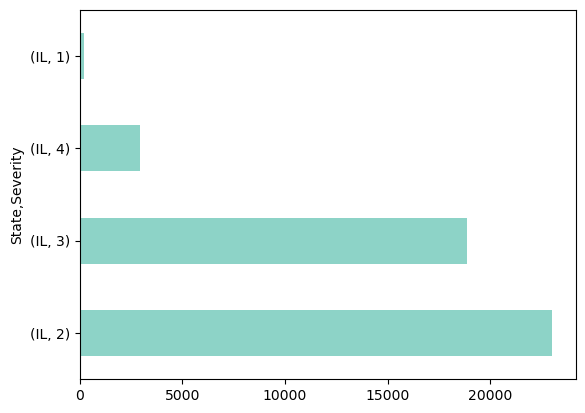

In [40]:
def chooseState(state):
    severity_data = data.loc[data['State']==state].groupby('State')['Severity'].value_counts()
    return severity_data

x = 'IL'

chooseState(x).plot(kind='barh', colormap='Set3')
plt.show()

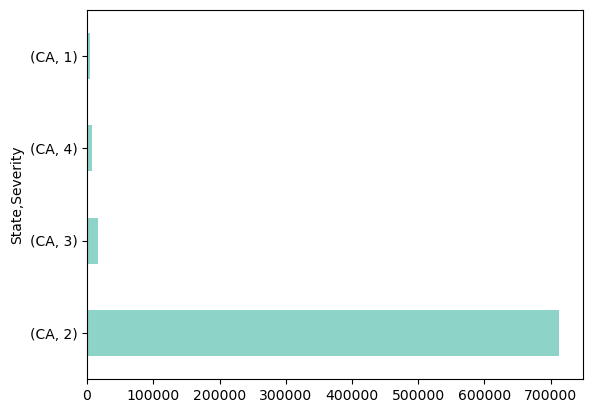

In [41]:
x = 'CA'

chooseState(x).plot(kind='barh', colormap='Set3')
plt.show()

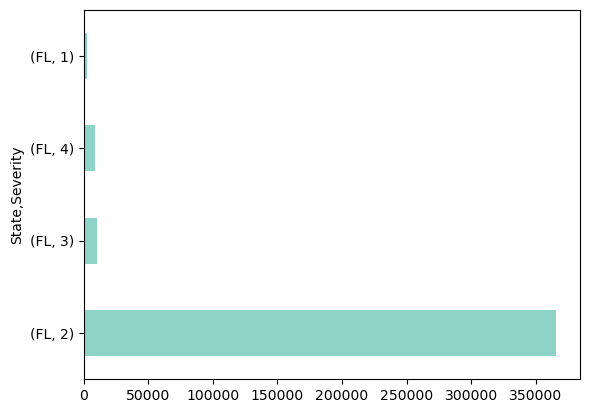

In [42]:
x = 'FL'

chooseState(x).plot(kind='barh', colormap='Set3')
plt.show()

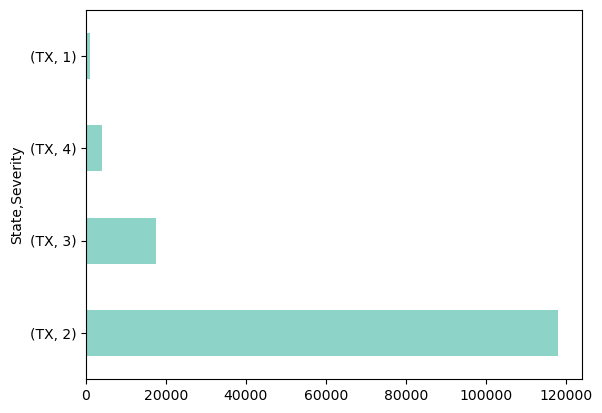

In [43]:
x = 'TX'

chooseState(x).plot(kind='barh', colormap='Set3')
plt.show()

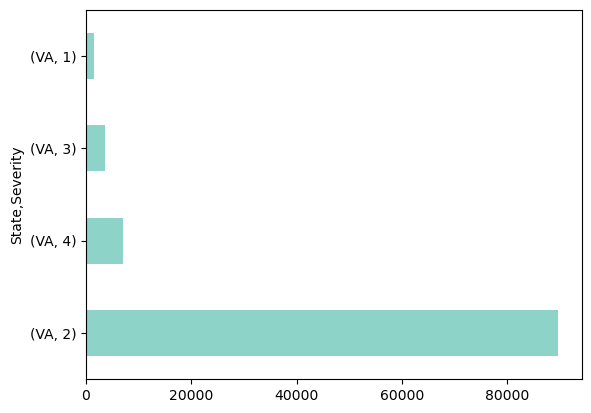

In [44]:
x = 'VA'

chooseState(x).plot(kind='barh', colormap='Set3')
plt.show()

In [45]:
import plotly.express as px

In [46]:
weather_acci = data['ID'].groupby([data['Weather_Condition'],data['Severity']]).count()
weather_acci = weather_acci.unstack(level=-1).fillna(0)
# data = weather_acci
fig = px.bar(weather_acci)

fig.show()

In [47]:
atstop = data['ID'].groupby([data['Stop'],data['Severity']]).count()
atstop = atstop.unstack(level=-1).fillna(0)

fig = px.bar(atstop)

fig.show()

In [8]:
data['Severity'].value_counts()

2    889904
4     29073
3     13716
1     10625
Name: Severity, dtype: int64

In [51]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.shape

(943318, 46)

In [10]:
data = data[data['Severity'] != 1]

In [11]:
data['Severity'].value_counts()

2    889904
4     29073
3     13716
Name: Severity, dtype: int64

In [322]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
data.drop(columns=['ID','Description','Street','County','Zipcode','Country','Timezone','Airport_Code','Amenity','Bump','Crossing','Give_Way','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop','Nautical_Twilight','Astronomical_Twilight'],inplace = True,axis =1)

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/2777164639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['ID','Description','Street','County','Zipcode','Country','Timezone','Airport_Code','Amenity','Bump','Crossing','Give_Way','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop','Nautical_Twilight','Astronomical_Twilight'],inplace = True,axis =1)


In [13]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Side', 'City', 'State',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Junction', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

In [14]:
data.drop(columns=['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng','Side'],inplace = True,axis =1)

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/505936075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',


In [16]:
data.shape

(932693, 17)

In [15]:
data.drop(columns = ['Weather_Timestamp'],inplace = True, axis =1)

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/4283747737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['Weather_Timestamp'],inplace = True, axis =1)


In [257]:
data.columns

Index(['Severity', 'Distance(mi)', 'City', 'State', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Junction', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight'],
      dtype='object')

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932693 entries, 42 to 2845307
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           932693 non-null  int64  
 1   Distance(mi)       932693 non-null  float64
 2   City               932693 non-null  object 
 3   State              932693 non-null  object 
 4   Temperature(F)     932693 non-null  float64
 5   Wind_Chill(F)      932693 non-null  float64
 6   Humidity(%)        932693 non-null  float64
 7   Pressure(in)       932693 non-null  float64
 8   Visibility(mi)     932693 non-null  float64
 9   Wind_Direction     932693 non-null  object 
 10  Wind_Speed(mph)    932693 non-null  float64
 11  Precipitation(in)  932693 non-null  float64
 12  Weather_Condition  932693 non-null  object 
 13  Junction           932693 non-null  bool   
 14  Traffic_Signal     932693 non-null  bool   
 15  Sunrise_Sunset     932693 non-null  object 
 16  

In [260]:
data['State'].nunique()

49

In [261]:
data['City'].nunique()

8482

In [18]:
city_df = data.City.value_counts()

In [19]:
city_df.head(60)

Miami                67269
Orlando              37429
Los Angeles          20194
Houston              18922
Charlotte            15930
Raleigh              15126
Dallas               14198
Austin               10590
Baton Rouge          10343
New Orleans           8671
Nashville             8190
Tucson                7978
Sacramento            7328
Bakersfield           6216
Rochester             6105
Chattanooga           5888
Hialeah               4844
Fort Myers            4758
Shreveport            4735
Sarasota              4697
Bradenton             4677
North Miami           4653
Columbia              4602
Greenville            4494
Lancaster             4394
Pensacola             4333
Grand Rapids          4294
San Diego             4228
Richmond              3736
Kissimmee             3663
Phoenix               3553
Washington            3468
Dayton                3401
Springfield           3297
Tulsa                 3262
Fresno                3221
Saint Petersburg      3201
T

In [20]:
high_acc = city_df[city_df>=500]
low_acc = city_df[city_df<500]

In [21]:
len(high_acc)

269

In [22]:
len(low_acc)

8213

In [23]:
print(high_acc)
print(low_acc)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(high_acc)
print(low_acc)

Miami          67269
Orlando        37429
Los Angeles    20194
Houston        18922
Charlotte      15930
               ...  
Lake Zurich      517
Nevada City      515
Orange           508
Chico            502
Eagle Point      500
Name: City, Length: 269, dtype: int64
Arlington                       499
Clearfield                      497
Clovis                          495
Montgomery                      495
Middletown                      494
                               ... 
Guffey                            1
Lagrange                          1
Blacklick                         1
Sudbury                           1
American Fork-Pleasant Grove      1
Name: City, Length: 8213, dtype: int64
Miami                 67269
Orlando               37429
Los Angeles           20194
Houston               18922
Charlotte             15930
Raleigh               15126
Dallas                14198
Austin                10590
Baton Rouge           10343
New Orleans            8671
Nashville       

In [24]:
print(type(high_acc))
x = high_acc.keys()

<class 'pandas.core.series.Series'>


In [25]:
replace_values = set(x)
replace_values

{'Aiken',
 'Albany',
 'Alexandria',
 'Altoona',
 'Ambler',
 'Anaheim',
 'Anderson',
 'Antioch',
 'Apopka',
 'Auburn',
 'Austin',
 'Aventura',
 'Bakersfield',
 'Baton Rouge',
 'Bell Gardens',
 'Bend',
 'Bloomington',
 'Boiling Springs',
 'Boise',
 'Bonita Springs',
 'Bozeman',
 'Bradenton',
 'Brandon',
 'Brentwood',
 'Bronx',
 'Brooklyn',
 'Castro Valley',
 'Centreville',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chester',
 'Chicago',
 'Chico',
 'Chiloquin',
 'Cincinnati',
 'City Of Industry',
 'Clearwater',
 'Columbia',
 'Commerce',
 'Compton',
 'Conway',
 'Coos Bay',
 'Coral Gables',
 'Corona',
 'Crescent City',
 'Cutler Bay',
 'Dallas',
 'Dayton',
 'Denver',
 'Doral',
 'Eagle Point',
 'Easley',
 'Elgin',
 'Elkins Park',
 'Escondido',
 'Fairfax',
 'Fallbrook',
 'Flint',
 'Florence',
 'Fontana',
 'Fort Lauderdale',
 'Fort Mill',
 'Fort Myers',
 'Fort Walton Beach',
 'Fort Washington',
 'Frederick',
 'Fredericksburg',
 'Fresno',
 'Gainesville',
 'Garden Grove',
 'Gardena',
 'Garner

In [26]:
data['City'] = data['City'].apply(lambda y: 'Other' if y not in replace_values else y)

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/3396235364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City'] = data['City'].apply(lambda y: 'Other' if y not in replace_values else y)


In [27]:
data.shape

(932693, 17)

In [270]:
print(csv)

Miami,Orlando,Los,Angeles,Houston,Charlotte,Raleigh,Dallas,Austin,Baton,Rouge,New,Orleans,Nashville,Tucson,Sacramento,Bakersfield,Rochester,Chattanooga,Hialeah,Fort,Myers,Shreveport,Sarasota,Bradenton,North,Miami,Columbia,Greenville,Lancaster,Pensacola,Grand,Rapids,San,Diego,Richmond,Kissimmee,Phoenix,Washington,Dayton,Springfield,Tulsa,Fresno,Saint,Petersburg,Tampa,Whittier,Stockton,Homestead,Portland,Florence,North,Miami,Beach,Modesto,Flint,Tyler,Opa,Locka,Ocala,Tallahassee,San,Bernardino


In [271]:
csv_n = "Miami,Orlando,Los Angeles,Houston,Charlotte,Raleigh,Dallas,Austin,Baton,Rouge,New Orleans,Nashville,Tucson,Sacramento,Bakersfield,Rochester,Chattanooga,Hialeah,Fort Myers,Shreveport,Sarasota,Bradenton,North Miami,Columbia,Greenville,Lancaster,Pensacola,Grand Rapids,San Diego,Richmond,Kissimmee,Phoenix,Washington,Dayton,Springfield,Tulsa,Fresno,Saint Petersburg,Tampa,Whittier,Stockton,Homestead,Portland,Florence,North Miami Beach,Modesto,Flint,Tyler,Opa Locka,Ocala,Tallahassee,San Bernardino"

x = csv_n.split(',')
quoted_val = ['' + word + '' for word in x]
print(quoted_val)

['Miami', 'Orlando', 'Los Angeles', 'Houston', 'Charlotte', 'Raleigh', 'Dallas', 'Austin', 'Baton', 'Rouge', 'New Orleans', 'Nashville', 'Tucson', 'Sacramento', 'Bakersfield', 'Rochester', 'Chattanooga', 'Hialeah', 'Fort Myers', 'Shreveport', 'Sarasota', 'Bradenton', 'North Miami', 'Columbia', 'Greenville', 'Lancaster', 'Pensacola', 'Grand Rapids', 'San Diego', 'Richmond', 'Kissimmee', 'Phoenix', 'Washington', 'Dayton', 'Springfield', 'Tulsa', 'Fresno', 'Saint Petersburg', 'Tampa', 'Whittier', 'Stockton', 'Homestead', 'Portland', 'Florence', 'North Miami Beach', 'Modesto', 'Flint', 'Tyler', 'Opa Locka', 'Ocala', 'Tallahassee', 'San Bernardino']


In [342]:
data['City'].value_counts()

Other                 360609
Miami                  67269
Orlando                37429
Los Angeles            20194
Houston                18922
Charlotte              15930
Raleigh                15126
Dallas                 14198
Austin                 10590
Baton Rouge            10343
New Orleans             8671
Nashville               8190
Tucson                  7978
Sacramento              7328
Bakersfield             6216
Rochester               6105
Chattanooga             5888
Hialeah                 4844
Fort Myers              4758
Shreveport              4735
Sarasota                4697
Bradenton               4677
North Miami             4653
Columbia                4602
Greenville              4494
Lancaster               4394
Pensacola               4333
Grand Rapids            4294
San Diego               4228
Richmond                3736
Kissimmee               3663
Phoenix                 3553
Washington              3468
Dayton                  3401
Springfield   

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932693 entries, 42 to 2845307
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           932693 non-null  int64  
 1   Distance(mi)       932693 non-null  float64
 2   City               932693 non-null  object 
 3   State              932693 non-null  object 
 4   Temperature(F)     932693 non-null  float64
 5   Wind_Chill(F)      932693 non-null  float64
 6   Humidity(%)        932693 non-null  float64
 7   Pressure(in)       932693 non-null  float64
 8   Visibility(mi)     932693 non-null  float64
 9   Wind_Direction     932693 non-null  object 
 10  Wind_Speed(mph)    932693 non-null  float64
 11  Precipitation(in)  932693 non-null  float64
 12  Weather_Condition  932693 non-null  object 
 13  Junction           932693 non-null  bool   
 14  Traffic_Signal     932693 non-null  bool   
 15  Sunrise_Sunset     932693 non-null  object 
 16  

In [345]:
data.shape

(932693, 17)

In [346]:
data['Wind_Direction'].shape

(932693,)

In [347]:
data['Wind_Direction'].value_counts()

CALM         171166
SouthWest    126696
SouthEast    121703
NorthEast     99035
North         93490
NorthWest     92375
South         68253
West          61453
East          56537
Variable      41985
Name: Wind_Direction, dtype: int64

In [28]:
data['Wind_Direction'] = data['Wind_Direction'].replace('W', 'West')
data['Wind_Direction'] = data['Wind_Direction'].replace('S', 'South')
data['Wind_Direction'] = data['Wind_Direction'].replace('E', 'East')
data['Wind_Direction'] = data['Wind_Direction'].replace('N', 'North')
data['Wind_Direction'] = data['Wind_Direction'].replace('VAR', 'Variable')

data['Wind_Direction'].value_counts()

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/4245565368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wind_Direction'] = data['Wind_Direction'].replace('W', 'West')
/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/4245565368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wind_Direction'] = data['Wind_Direction'].replace('S', 'South')
/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/4245565368.py:3: SettingWithCopyWarning: 
A value is

CALM        171166
South        68253
West         61453
East         56537
North        52141
WNW          46411
NW           45964
SSW          44074
SSE          43589
SW           42017
Variable     41985
NNW          41349
WSW          40605
SE           39178
ESE          38936
ENE          36644
NE           32479
NNE          29912
Name: Wind_Direction, dtype: int64

In [29]:
data['Wind_Direction'] = data['Wind_Direction'].replace('WNW', 'NorthWest')
data['Wind_Direction'] = data['Wind_Direction'].replace('NW', 'NorthWest')
data['Wind_Direction'] = data['Wind_Direction'].replace('SSW', 'SouthWest')
data['Wind_Direction'] = data['Wind_Direction'].replace('WSW', 'SouthWest')
data['Wind_Direction'] = data['Wind_Direction'].replace('SW', 'SouthWest')

data['Wind_Direction'] = data['Wind_Direction'].replace('SSE', 'SouthEast')
data['Wind_Direction'] = data['Wind_Direction'].replace('SE', 'SouthEast')
data['Wind_Direction'] = data['Wind_Direction'].replace('ESE', 'SouthEast')

data['Wind_Direction'] = data['Wind_Direction'].replace('NE', 'NorthEast')
data['Wind_Direction'] = data['Wind_Direction'].replace('NNE', 'NorthEast')
data['Wind_Direction'] = data['Wind_Direction'].replace('ENE', 'NorthEast')

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/3354461336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wind_Direction'] = data['Wind_Direction'].replace('WNW', 'NorthWest')
/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/3354461336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wind_Direction'] = data['Wind_Direction'].replace('NW', 'NorthWest')
/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/3354461336.py:3: SettingWithCopyWarning:

In [30]:
data['Wind_Direction'] = data['Wind_Direction'].replace('NNW', 'North')
data['Wind_Direction'].value_counts()

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1166515785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wind_Direction'] = data['Wind_Direction'].replace('NNW', 'North')


CALM         171166
SouthWest    126696
SouthEast    121703
NorthEast     99035
North         93490
NorthWest     92375
South         68253
West          61453
East          56537
Variable      41985
Name: Wind_Direction, dtype: int64

In [31]:
data['Weather_Condition'].value_counts()
data['Weather_Condition'].nunique()

91

In [349]:
data['Weather_Condition'].value_counts()

Fair                              460528
Cloudy                            138735
Mostly Cloudy                     121741
Partly Cloudy                      84008
Light Rain                         38964
Fog                                17219
Haze                               11167
Light Snow                         10627
Rain                                7309
Fair / Windy                        6041
Thunder in the Vicinity             3679
Thunder                             3096
Smoke                               2981
Cloudy / Windy                      2733
Heavy Rain                          2680
T-Storm                             2653
Mostly Cloudy / Windy               2465
Light Rain with Thunder             2223
Light Drizzle                       1936
Heavy T-Storm                       1435
Partly Cloudy / Windy               1390
Light Rain / Windy                  1172
Snow                                1170
Wintry Mix                          1148
Overcast        

In [32]:
data['Weather_Condition'] = data['Weather_Condition'].replace('Fair', 'Clear')
data['Weather_Condition'] = data['Weather_Condition'].replace('Mostly Cloudy', 'Cloudy')
data['Weather_Condition'] = data['Weather_Condition'].replace('Partly Cloudy', 'Scattered Clouds')

data['Weather_Condition'] = data['Weather_Condition'].replace('Overcast', 'Thunderstorm')
data['Weather_Condition'] = data['Weather_Condition'].replace('Heavy Rain', 'Thunderstorm')
data['Weather_Condition'] = data['Weather_Condition'].replace('T-Storm', 'Thunderstorm')
data['Weather_Condition'] = data['Weather_Condition'].replace('Heavy T-Storm', 'Thunderstorm')



data['Weather_Condition'] = data['Weather_Condition'].replace('Fair / Windy', 'Windy')
data['Weather_Condition'] = data['Weather_Condition'].replace('Cloudy / Windy', 'Windy')
data['Weather_Condition'] = data['Weather_Condition'].replace('Mostly Cloudy / Windy', 'Windy')
data['Weather_Condition'] = data['Weather_Condition'].replace('Partly Cloudy / Windy', 'Windy')
data['Weather_Condition'] = data['Weather_Condition'].replace('Light Rain / Windy', 'Windy')
data['Weather_Condition'] = data['Weather_Condition'].replace('Light Snow / Windy', 'Windy')
data['Weather_Condition'] = data['Weather_Condition'].replace('Rain / Windy', 'Windy')


data['Weather_Condition'] = data['Weather_Condition'].replace('Heavy Snow', 'Snow')
data['Weather_Condition'] = data['Weather_Condition'].replace('Light Snow', 'Snow')

data['Weather_Condition'] = data['Weather_Condition'].replace('Light Rain', 'Rain')
data['Weather_Condition'] = data['Weather_Condition'].replace('Haze', 'Rain')


data['Weather_Condition'].value_counts()

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1377246775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather_Condition'] = data['Weather_Condition'].replace('Fair', 'Clear')
/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1377246775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather_Condition'] = data['Weather_Condition'].replace('Mostly Cloudy', 'Cloudy')
/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1377246775.py:3: Settin

Clear                             460582
Cloudy                            260476
Scattered Clouds                   84035
Rain                               57440
Fog                                17219
Windy                              14738
Snow                               12134
Thunderstorm                        7793
Thunder in the Vicinity             3679
Thunder                             3096
Smoke                               2981
Light Rain with Thunder             2223
Light Drizzle                       1936
Wintry Mix                          1148
Drizzle                              450
Patches of Fog                       311
Shallow Fog                          303
N/A Precipitation                    284
Mist                                 216
Haze / Windy                         206
Heavy Rain / Windy                   156
Heavy T-Storm / Windy                141
Light Freezing Rain                  118
Snow / Windy                         104
Thunder / Windy 

In [33]:
data['Weather_Condition'] = data['Weather_Condition'].replace('Fog', 'Snow')

data['Weather_Condition'] = data['Weather_Condition'].replace('Smoke', 'Windy')

data['Weather_Condition'] = data['Weather_Condition'].replace('Thunder in the Vicinity', 'Thunderstorm')

data['Weather_Condition'] = data['Weather_Condition'].replace('Thunder', 'Thunderstorm')


data['Weather_Condition'] = data['Weather_Condition'].replace('Wintry Mix', 'Windy')


data['Weather_Condition'] = data['Weather_Condition'].replace('Drizzle', 'Rain')
data['Weather_Condition'] = data['Weather_Condition'].replace('Light Drizzle', 'Rain')

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1063211201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather_Condition'] = data['Weather_Condition'].replace('Fog', 'Snow')
/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1063211201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather_Condition'] = data['Weather_Condition'].replace('Smoke', 'Windy')
/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1063211201.py:5: SettingWithCopyWa

In [34]:
data['Weather_Condition'].value_counts()

Clear                             460582
Cloudy                            260476
Scattered Clouds                   84035
Rain                               59826
Snow                               29353
Windy                              18867
Thunderstorm                       14568
Light Rain with Thunder             2223
Patches of Fog                       311
Shallow Fog                          303
N/A Precipitation                    284
Mist                                 216
Haze / Windy                         206
Heavy Rain / Windy                   156
Heavy T-Storm / Windy                141
Light Freezing Rain                  118
Snow / Windy                         104
Thunder / Windy                       98
T-Storm / Windy                       97
Showers in the Vicinity               83
Fog / Windy                           77
Light Freezing Drizzle                61
Heavy Snow / Windy                    51
Drizzle and Fog                       38
Light Drizzle / 

In [35]:
data['Weather_Condition'] = data['Weather_Condition'].replace('Light Thunderstorms and Rain', 'Light Rain with Thunder')

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/171156516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather_Condition'] = data['Weather_Condition'].replace('Light Thunderstorms and Rain', 'Light Rain with Thunder')


In [36]:
remv_weather_vals = {'Clear', 'Cloudy','Scattered Clouds','Rain','Thunderstorm' ,'Snow','Windy','Light Rain with Thunder'}


In [37]:
data['Weather_Condition'] = data['Weather_Condition'].apply(lambda x: 'Other' if x not in remv_weather_vals else x)

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/2656774952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather_Condition'] = data['Weather_Condition'].apply(lambda x: 'Other' if x not in remv_weather_vals else x)


In [38]:
data['Weather_Condition'].value_counts()

Clear                      460582
Cloudy                     260476
Scattered Clouds            84035
Rain                        59826
Snow                        29353
Windy                       18867
Thunderstorm                14568
Other                        2762
Light Rain with Thunder      2224
Name: Weather_Condition, dtype: int64

In [357]:
data['Civil_Twilight'].value_counts()

Day      622721
Night    309972
Name: Civil_Twilight, dtype: int64

In [358]:
data['Sunrise_Sunset'].value_counts()

Day      586826
Night    345867
Name: Sunrise_Sunset, dtype: int64

In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932693 entries, 42 to 2845307
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           932693 non-null  int64  
 1   Distance(mi)       932693 non-null  float64
 2   City               932693 non-null  object 
 3   State              932693 non-null  object 
 4   Temperature(F)     932693 non-null  float64
 5   Wind_Chill(F)      932693 non-null  float64
 6   Humidity(%)        932693 non-null  float64
 7   Pressure(in)       932693 non-null  float64
 8   Visibility(mi)     932693 non-null  float64
 9   Wind_Direction     932693 non-null  object 
 10  Wind_Speed(mph)    932693 non-null  float64
 11  Precipitation(in)  932693 non-null  float64
 12  Weather_Condition  932693 non-null  object 
 13  Junction           932693 non-null  bool   
 14  Traffic_Signal     932693 non-null  bool   
 15  Sunrise_Sunset     932693 non-null  object 
 16  

In [39]:
data['Severity'].value_counts()

2    889904
4     29073
3     13716
Name: Severity, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder


In [41]:
label_encoder = LabelEncoder()

In [42]:
city_encoded_attribute = label_encoder.fit_transform(data['City'])

In [43]:
data['City']=city_encoded_attribute

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/356912073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City']=city_encoded_attribute


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630385 entries, 0 to 2845341
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Distance(mi)       float64
 2   City               int64  
 3   State              object 
 4   Temperature(F)     float64
 5   Humidity(%)        float64
 6   Pressure(in)       float64
 7   Visibility(mi)     float64
 8   Wind_Direction     object 
 9   Wind_Speed(mph)    float64
 10  Weather_Condition  object 
 11  Junction           bool   
 12  Traffic_Signal     bool   
 13  Sunrise_Sunset     object 
 14  Civil_Twilight     object 
 15  Hour_of_Day        int64  
 16  Day_of_Week        int64  
dtypes: bool(2), float64(6), int64(4), object(5)
memory usage: 326.1+ MB


In [202]:
data['City'].value_counts()

32    1895295
25     104411
31      53358
13      41011
20      37375
41      31247
8       30990
26      22472
37      22239
36      19314
27      19206
3       16274
2       14327
22      14167
35      14063
39      12767
38      12543
4       11854
48      11111
10      10723
30      10268
19      10115
0        9744
47       9717
29       9438
6        9368
11       9336
40       9228
49       9061
9        9015
17       8796
12       8091
43       7989
21       7880
34       7359
15       7301
45       7186
18       7081
16       7008
5        6874
50       6776
42       6768
24       6679
23       6098
44       6059
33       5858
1        5650
46       5420
14       5335
28       5097
7        5043
Name: City, dtype: int64

In [203]:
data['City'].nunique()

51

In [44]:
state_encoded_attribute = label_encoder.fit_transform(data['State'])
data['State']=state_encoded_attribute

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/2508440046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State']=state_encoded_attribute


In [205]:
data['State'].nunique()

49

In [45]:
wind_encoded_attribute = label_encoder.fit_transform(data['Wind_Direction'])
data['Wind_Direction']=wind_encoded_attribute

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/2689845243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wind_Direction']=wind_encoded_attribute


In [207]:

data['Wind_Direction'].nunique()

10

In [46]:
weather_encoded_attribute = label_encoder.fit_transform(data['Weather_Condition'])
data['Weather_Condition']=weather_encoded_attribute

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1419980649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather_Condition']=weather_encoded_attribute


In [209]:
data['Weather_Condition'].nunique()

9

In [47]:
light_encoded_attribute = label_encoder.fit_transform(data['Civil_Twilight'])
data['Civil_Twilight']=light_encoded_attribute

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/488149722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Civil_Twilight']=light_encoded_attribute


In [211]:
data['Civil_Twilight'].nunique()

2

In [48]:
sun_encoded_attribute = label_encoder.fit_transform(data['Sunrise_Sunset'])
data['Sunrise_Sunset']=sun_encoded_attribute

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/1560273776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sunrise_Sunset']=sun_encoded_attribute


In [213]:
data['Sunrise_Sunset'].nunique()

2

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932693 entries, 42 to 2845307
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           932693 non-null  int64  
 1   Distance(mi)       932693 non-null  float64
 2   City               932693 non-null  int64  
 3   State              932693 non-null  int64  
 4   Temperature(F)     932693 non-null  float64
 5   Wind_Chill(F)      932693 non-null  float64
 6   Humidity(%)        932693 non-null  float64
 7   Pressure(in)       932693 non-null  float64
 8   Visibility(mi)     932693 non-null  float64
 9   Wind_Direction     932693 non-null  int64  
 10  Wind_Speed(mph)    932693 non-null  float64
 11  Precipitation(in)  932693 non-null  float64
 12  Weather_Condition  932693 non-null  int64  
 13  Junction           932693 non-null  bool   
 14  Traffic_Signal     932693 non-null  bool   
 15  Sunrise_Sunset     932693 non-null  int64  
 16  

In [215]:
data['Junction'].value_counts()

False    2367923
True      262462
Name: Junction, dtype: int64

In [50]:
jun_encoded_attribute = label_encoder.fit_transform(data['Junction'])
data['Junction']=jun_encoded_attribute

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/3438706141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Junction']=jun_encoded_attribute


In [51]:
trafic_encoded_attribute = label_encoder.fit_transform(data['Traffic_Signal'])
data['Traffic_Signal']=trafic_encoded_attribute

/var/folders/f_/__hf67lj0rb__hyh6pzxn6br0000gn/T/ipykernel_31440/2551763273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Traffic_Signal']=trafic_encoded_attribute


In [52]:
data_final_new1 = data.copy(deep=True)

In [53]:
data_final_new1.shape

(932693, 17)

In [54]:
data.shape

(932693, 17)

In [55]:
data_x1 = data.copy(deep=True)

In [56]:
data_x1.drop(columns = ['Severity'],inplace = True, axis =1)


In [378]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(data_x, data['Severity'], test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score 
rf.score(X_trn, y_trn)

0.9727683561302358

In [379]:
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           2       0.96      1.00      0.98    177887
           3       0.85      0.36      0.51      2737
           4       0.78      0.13      0.22      5915

    accuracy                           0.96    186539
   macro avg       0.87      0.50      0.57    186539
weighted avg       0.96      0.96      0.95    186539



In [380]:
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.9490696124696884


In [ ]:
rf.predict(X_tst)

In [381]:
type(X_tst)

pandas.core.frame.DataFrame

In [382]:
X_tst.shape

(186539, 16)

In [383]:
import joblib

In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932693 entries, 42 to 2845307
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           932693 non-null  int64  
 1   Distance(mi)       932693 non-null  float64
 2   City               932693 non-null  int64  
 3   State              932693 non-null  int64  
 4   Temperature(F)     932693 non-null  float64
 5   Wind_Chill(F)      932693 non-null  float64
 6   Humidity(%)        932693 non-null  float64
 7   Pressure(in)       932693 non-null  float64
 8   Visibility(mi)     932693 non-null  float64
 9   Wind_Direction     932693 non-null  int64  
 10  Wind_Speed(mph)    932693 non-null  float64
 11  Precipitation(in)  932693 non-null  float64
 12  Weather_Condition  932693 non-null  int64  
 13  Junction           932693 non-null  int64  
 14  Traffic_Signal     932693 non-null  int64  
 15  Sunrise_Sunset     932693 non-null  int64  
 16  

In [59]:
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = data[['City','State','Junction',
       'Weather_Condition','Traffic_Signal','Civil_Twilight','Sunrise_Sunset','Wind_Direction']]

encoder = OrdinalEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(new_fea_df))
encoded_df.columns = new_fea_df.columns

In [60]:
encoder.transform(new_fea_df.iloc[0:1,:]).reshape(1,-1)

array([[168.,  13.,   0.,   6.,   0.,   0.,   1.,   4.]])

In [61]:
joblib.dump(encoder, "ordinal_encoder.joblib")


['ordinal_encoder.joblib']

In [ ]:
final_df = pd.concat([encoded_df,data[['Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]], axis=1)


In [65]:
import joblib
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

# new_fea_df = data[['City','State','Junction',
#        'Weather_Condition','Traffic_Signal','Civil_Twilight','Sunrise_Sunset','Wind_Direction']]

# encoder = OrdinalEncoder()
# encoded_df = pd.DataFrame(encoder.fit_transform(new_fea_df))
# encoded_df.columns = new_fea_df.columns

# encoder.transform(new_fea_df.iloc[0:1,:]).reshape(1,-1)
# # save the ordinal encoder object for inference pipeline


#final_df = pd.concat([encoded_df,data[['Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(final_df, data['Severity'], test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy.joblib", compress=9)

ValueError: Found input variables with inconsistent numbers of samples: [1546711, 932693]

In [72]:
new=data[['Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]
new.head()


,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
42,6.690,19.9,7.3,81.0,29.85,2.0,12.7,0.00
43,6.690,19.9,7.3,81.0,29.85,2.0,12.7,0.00
47,1.206,17.1,0.6,77.0,29.91,2.5,19.6,0.01
50,0.824,21.0,9.9,85.0,29.69,1.0,10.4,0.00
66,0.462,24.1,7.1,75.0,29.82,2.0,28.8,0.00


In [73]:
new.shape

(932693, 8)

In [70]:
data.shape

(932693, 17)

In [82]:
#final_df_new = pd.concat([encoded_df,new], axis=1, reset_index=True)
result_df = pd.concat([encoded_df.reset_index(drop=True), new.reset_index(drop=True)], axis=1)


In [84]:
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(result_df, data['Severity'], test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy.joblib", compress=9)

['rta_model_deploy.joblib']

In [83]:
result_df.shape

(932693, 16)

In [85]:
predics2 = rf.predict(X_tst2)

In [87]:
from sklearn.metrics import classification_report
classif_re2 = classification_report(y_tst2,predics2)
print(classif_re2)

              precision    recall  f1-score   support

           2       0.96      1.00      0.98    177887
           3       0.85      0.36      0.51      2737
           4       0.78      0.13      0.22      5915

    accuracy                           0.96    186539
   macro avg       0.86      0.50      0.57    186539
weighted avg       0.96      0.96      0.95    186539



In [88]:
from sklearn.metrics import f1_score
f1score2 = f1_score(y_tst2,predics2, average='weighted')
print(f1score2)

0.9490425012676846


In [89]:
result_df.columns

Index(['City', 'State', 'Junction', 'Weather_Condition', 'Traffic_Signal',
       'Civil_Twilight', 'Sunrise_Sunset', 'Wind_Direction', 'Distance(mi)',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'],
      dtype='object')

In [91]:
data['City'].value_counts()

168    360609
133     67269
166     37429
118     20194
91      18922
29      15930
187     15126
47      14198
10      10590
13      10343
146      8671
143      8190
243      7978
197      7328
12       6216
194      6105
30       5888
87       4844
63       4758
224      4735
217      4697
21       4677
153      4653
38       4602
78       4494
107      4394
174      4333
75       4294
205      4228
191      3736
99       3663
178      3553
255      3468
48       3401
231      3297
245      3262
68       3221
200      3201
238      2991
262      2844
232      2732
90       2674
184      2650
59       2592
154      2590
140      2533
58       2239
247      2188
162      2162
157      2159
237      2050
204      2038
220      1970
230      1954
203      1951
37       1865
6        1833
150      1756
158      1741
40       1713
192      1669
141      1666
97       1655
202      1653
86       1638
113      1612
122      1562
199      1518
46       1499
159      1483
268      1455
193   

In [92]:
result_df.describe()

,City,State,Junction,Weather_Condition,Traffic_Signal,Civil_Twilight,Sunrise_Sunset,Wind_Direction,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000,932693.000000
mean,144.301078,18.638087,0.004150,1.459986,0.130441,0.332341,0.370826,4.028586,0.277283,63.723189,62.827304,64.768254,29.426506,9.194878,7.117241,0.004376
std,58.284212,14.997556,0.064289,2.157688,0.336788,0.471053,0.483026,2.858892,0.887077,18.157355,19.777823,22.239455,1.018893,2.466375,5.414732,0.042795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,-48.500000,1.000000,16.720000,0.000000,0.000000,0.000000
25%,118.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.042000,51.000000,51.000000,49.000000,29.290000,10.000000,3.000000,0.000000
50%,168.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.113000,66.000000,66.000000,67.000000,29.780000,10.000000,7.000000,0.000000
75%,168.000000,35.000000,0.000000,1.000000,0.000000,1.000000,1.000000,6.000000,0.257000,78.000000,78.000000,83.000000,29.980000,10.000000,10.000000,0.000000
max,269.000000,48.000000,1.000000,8.000000,1.000000,1.000000,1.000000,9.000000,112.968000,196.000000,196.000000,100.000000,58.160000,100.000000,1087.000000,9.990000
